DRUG OVERDOSE REVIEW

In [169]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
sns.set()


In [170]:
raw_dataset = pd.read_csv('Drug_overdose_Unitedstates.csv')
raw_dataset

,INDICATOR,PANEL,PANEL_NUM,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG
0,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.10,1999,1,All ages,1.10,6.1,NaN
1,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.10,2000,2,All ages,1.10,6.2,NaN
2,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.10,2001,3,All ages,1.10,6.8,NaN
3,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.10,2002,4,All ages,1.10,8.2,NaN
4,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.10,2003,5,All ages,1.10,8.9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6223,Drug overdose death rates,Drug overdose deaths involving heroin,5,"Deaths per 100,000 resident population, crude",2,Sex and age,3,Female: 45-54 years,3.25,2018,20,45-54 years,1.60,3.4,NaN
6224,Drug overdose death rates,Drug overdose deaths involving heroin,5,"Deaths per 100,000 resident population, crude",2,Sex and age,3,Female: 55-64 years,3.26,2018,20,55-64 years,1.70,2.3,NaN
6225,Drug overdose death rates,Drug overdose deaths involving heroin,5,"Deaths per 100,000 resident population, crude",2,Sex and age,3,Female: 65-74 years,3.27,2018,20,65-74 years,1.80,0.4,NaN
6226,Drug overdose death rates,Drug overdose deaths involving heroin,5,"Deaths per 100,000 resident population, crude",2,Sex and age,3,Female: 75-84 years,3.28,2018,20,75-84 years,1.90,NaN,*


In [171]:
# Obtaining more information from the data collected across the USA
raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6228 entries, 0 to 6227
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   INDICATOR       6228 non-null   object 
 1   PANEL           6228 non-null   object 
 2   PANEL_NUM       6228 non-null   int64  
 3   UNIT            6228 non-null   object 
 4   UNIT_NUM        6228 non-null   int64  
 5   STUB_NAME       6228 non-null   object 
 6   STUB_NAME_NUM   6228 non-null   int64  
 7   STUB_LABEL      6228 non-null   object 
 8   STUB_LABEL_NUM  6228 non-null   float64
 9   YEAR            6228 non-null   int64  
 10  YEAR_NUM        6228 non-null   int64  
 11  AGE             6228 non-null   object 
 12  AGE_NUM         6228 non-null   float64
 13  ESTIMATE        5117 non-null   float64
 14  FLAG            1111 non-null   object 
dtypes: float64(3), int64(5), object(7)
memory usage: 730.0+ KB


A number of objects have missing entries from the raw data or null. These entries will be dropped in order to make room for analysis on the other components in the data.

In [172]:
# Cleaning up data for exploratory analysis
new_data = raw_dataset[['INDICATOR', 'PANEL', 'UNIT', 'STUB_NAME', 'YEAR','AGE','ESTIMATE' ]]
new_data

,INDICATOR,PANEL,UNIT,STUB_NAME,YEAR,AGE,ESTIMATE
0,Drug overdose death rates,All drug overdose deaths,"Deaths per 100,000 resident population, age-ad...",Total,1999,All ages,6.1
1,Drug overdose death rates,All drug overdose deaths,"Deaths per 100,000 resident population, age-ad...",Total,2000,All ages,6.2
2,Drug overdose death rates,All drug overdose deaths,"Deaths per 100,000 resident population, age-ad...",Total,2001,All ages,6.8
3,Drug overdose death rates,All drug overdose deaths,"Deaths per 100,000 resident population, age-ad...",Total,2002,All ages,8.2
4,Drug overdose death rates,All drug overdose deaths,"Deaths per 100,000 resident population, age-ad...",Total,2003,All ages,8.9
...,...,...,...,...,...,...,...
6223,Drug overdose death rates,Drug overdose deaths involving heroin,"Deaths per 100,000 resident population, crude",Sex and age,2018,45-54 years,3.4
6224,Drug overdose death rates,Drug overdose deaths involving heroin,"Deaths per 100,000 resident population, crude",Sex and age,2018,55-64 years,2.3
6225,Drug overdose death rates,Drug overdose deaths involving heroin,"Deaths per 100,000 resident population, crude",Sex and age,2018,65-74 years,0.4
6226,Drug overdose death rates,Drug overdose deaths involving heroin,"Deaths per 100,000 resident population, crude",Sex and age,2018,75-84 years,NaN


In [173]:
# Collecting general data of drug addiction over the period of years under study
new_data.describe()

,YEAR,ESTIMATE
count,6228.000000,5117.000000
mean,2008.664740,4.743443
std,5.849512,6.424471
min,1999.000000,0.000000
25%,2004.000000,0.800000
50%,2009.000000,2.100000
75%,2014.000000,6.000000
max,2018.000000,54.300000


From the general description we see an increase in drug use and abuse from the year 1999(min) to the year 2018(max)

Exploratory Analysis.
1. What has been the death rate trends in relation to drug use over these periods of years?
2. Whats the distribution across various age groups?
3. What are the distributions of drug overdose in the various panels(category)?
4. What is the impact of the different units of measurement on drug overdose death rates?

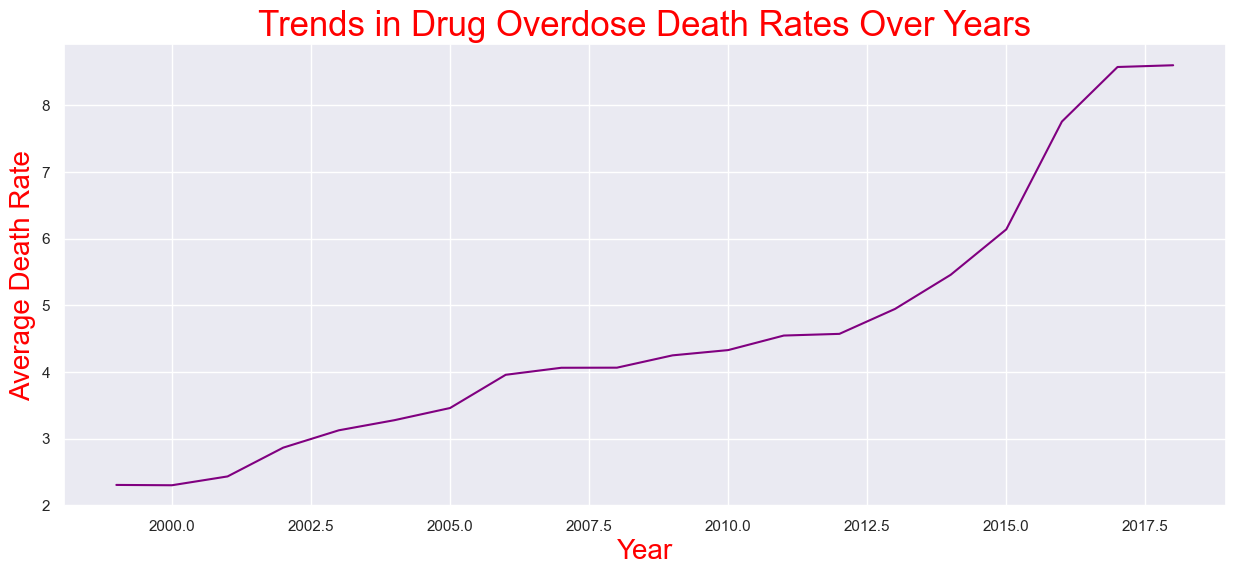

In [174]:
#  Time Series Analysis of drug use
time_series= new_data.groupby('YEAR')['ESTIMATE'].mean()
time_series.plot(kind='line', figsize=(15, 6), color='purple')
plt.title('Trends in Drug Overdose Death Rates Over Years', fontsize= 25, color='red')
plt.xlabel('Year', fontsize= 20, color='red')
plt.ylabel('Average Death Rate', fontsize= 20, color='red')
plt.grid(True)
plt.show()

A general increase in drug overdose death rates is observed over the years, with some slight fluctuations in certain periods.

In [185]:
# Understanding the negative impact of drug overdose rates among various age groups

age_group= new_data.groupby('AGE')['ESTIMATE'].describe()
age_group

,count,mean,std,min,25%,50%,75%,max
AGE,,,,,,,,
15-24 years,355.0,3.066761,3.384205,0.1,0.600,1.8,4.250,17.5
25-34 years,360.0,7.459722,9.124827,0.2,1.500,3.6,10.225,54.3
35-44 years,360.0,8.462778,9.337414,0.4,1.800,4.4,12.525,53.0
45-54 years,360.0,8.617222,9.276816,0.3,1.975,4.5,12.325,48.3
55-64 years,350.0,5.116571,6.366127,0.1,1.000,2.1,6.800,37.2
65-74 years,289.0,1.937370,2.216539,0.1,0.400,1.1,2.700,13.9
75-84 years,183.0,1.507650,1.265713,0.2,0.500,0.9,2.900,4.5
85 years and over,132.0,2.423485,1.770576,0.5,0.800,1.2,4.100,5.9
All ages,2573.0,4.423863,5.443202,0.1,0.900,2.1,5.900,35.8


In [190]:
# Drop the rows where 'AGE' is 'All ages'
age_group_data = new_data[new_data['AGE'] != 'All ages']
age_group_datanew= age_group_data.groupby('AGE')['ESTIMATE'].describe()
age_group_datanew

,count,mean,std,min,25%,50%,75%,max
AGE,,,,,,,,
15-24 years,355.0,3.066761,3.384205,0.1,0.600,1.8,4.250,17.5
25-34 years,360.0,7.459722,9.124827,0.2,1.500,3.6,10.225,54.3
35-44 years,360.0,8.462778,9.337414,0.4,1.800,4.4,12.525,53.0
45-54 years,360.0,8.617222,9.276816,0.3,1.975,4.5,12.325,48.3
55-64 years,350.0,5.116571,6.366127,0.1,1.000,2.1,6.800,37.2
65-74 years,289.0,1.937370,2.216539,0.1,0.400,1.1,2.700,13.9
75-84 years,183.0,1.507650,1.265713,0.2,0.500,0.9,2.900,4.5
85 years and over,132.0,2.423485,1.770576,0.5,0.800,1.2,4.100,5.9
Under 15 years,155.0,0.129677,0.064641,0.0,0.100,0.1,0.200,0.3


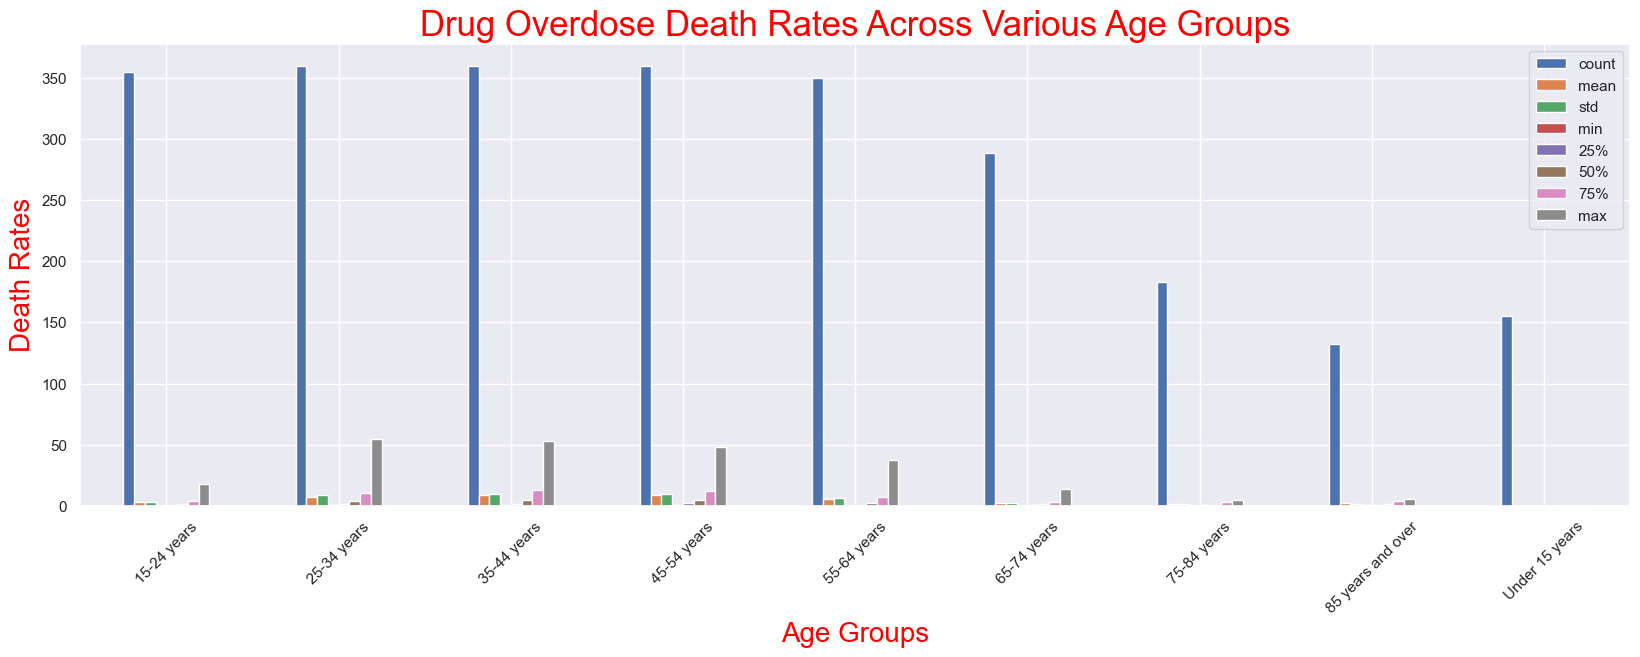

In [191]:
#still on age group analysis
group_analysis= age_group_data.groupby('AGE')['ESTIMATE'].describe()
group_analysis.plot(kind='bar', figsize=(20, 6))
plt.title('Drug Overdose Death Rates Across Various Age Groups', fontsize=25, color='red')
plt.xlabel('Age Groups', fontsize=20, color='red')
plt.ylabel('Death Rates', fontsize=20, color='red')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Two key observations are made. The drug overdose death rates vary across different age groups.  Higher rates are typically observed in younger age groups compared to older age groups.
Its also observed that people within 25-34 age group tends to have the highest average death rates, followed by the 35-44 age group.

In [177]:
# Exploring drug overdose in the various category
panel_analysis= new_data.groupby('PANEL')['ESTIMATE'].describe()
panel_analysis

,count,mean,std,min,25%,50%,75%,max
PANEL,,,,,,,,
All drug overdose deaths,1037.0,10.940212,9.165554,0.1,3.9,8.6,15.700,54.3
Drug overdose deaths involving any opioid,997.0,6.306219,6.241594,0.1,1.4,4.8,9.000,41.7
Drug overdose deaths involving heroin,704.0,2.262074,2.596841,0.1,0.6,1.3,2.700,17.1
Drug overdose deaths involving methadone,723.0,1.279806,0.884669,0.0,0.6,1.1,1.800,4.8
Drug overdose deaths involving natural and semisynthetic opioids,920.0,2.619565,2.132062,0.0,0.8,2.0,3.825,9.5
Drug overdose deaths involving other synthetic opioids (other than methadone),736.0,2.326223,4.061749,0.0,0.4,0.9,1.800,29.8


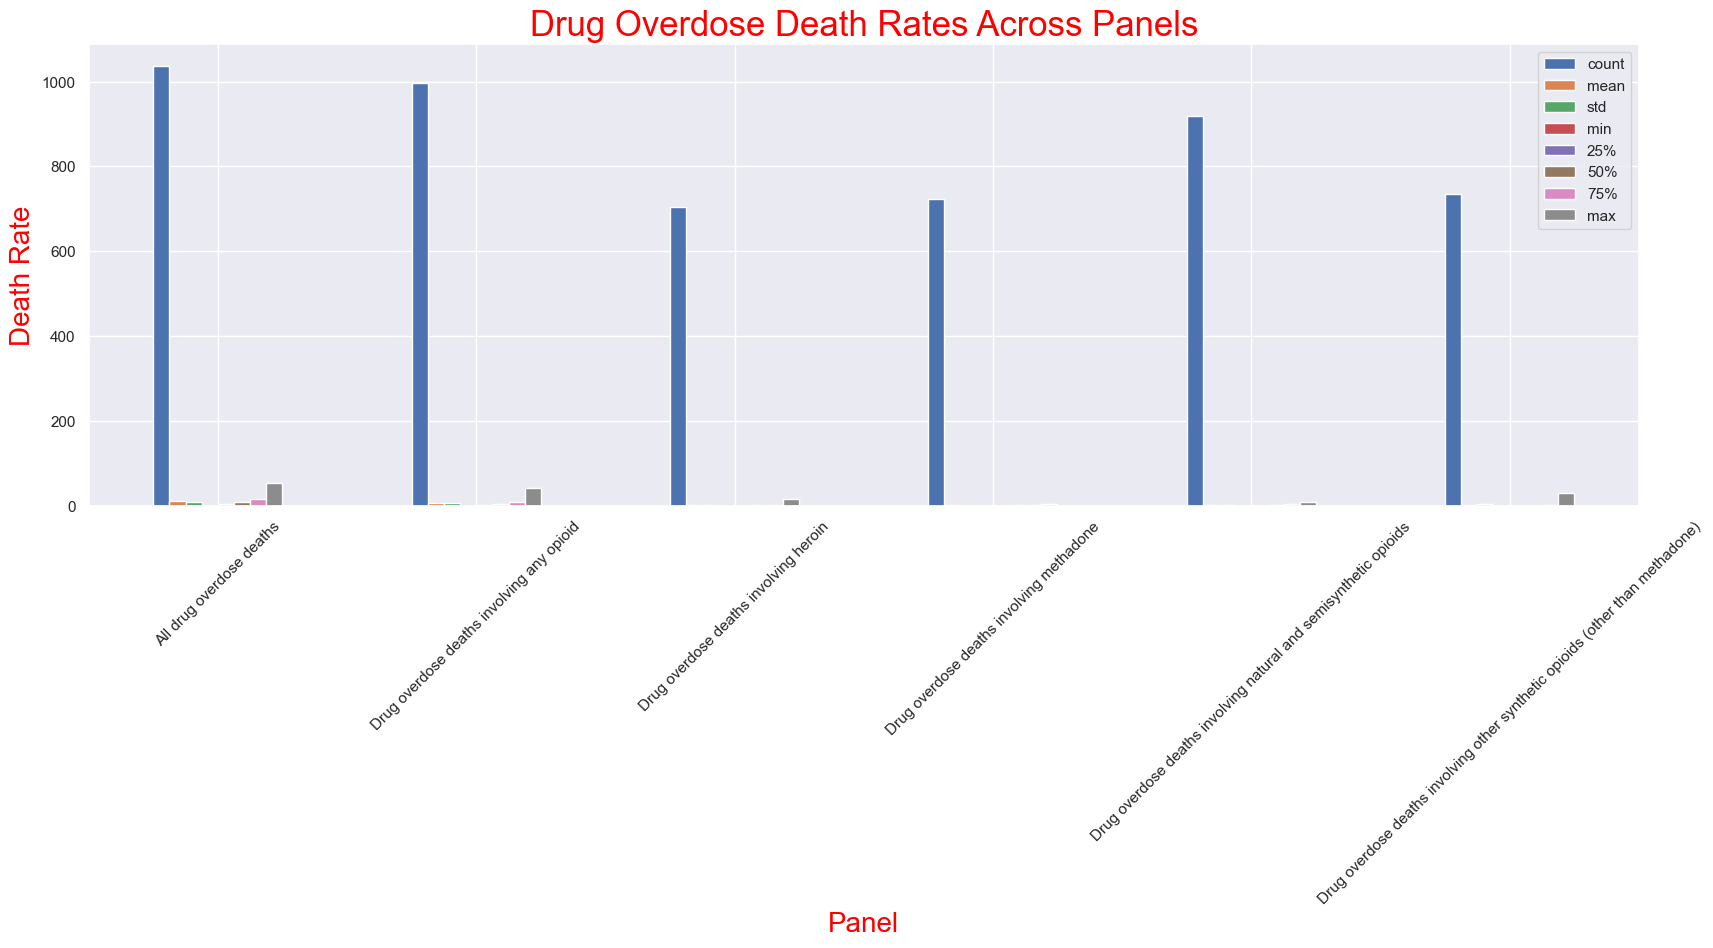

In [178]:
panel_analysis= new_data.groupby('PANEL')['ESTIMATE'].describe()
panel_analysis.plot(kind='bar', figsize=(20, 6))
plt.title('Drug Overdose Death Rates Across Panels', fontsize=25, color='red')
plt.xlabel('Panel', fontsize=20, color='red')
plt.ylabel('Death Rate', fontsize=20, color='red')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

There are variations in drug overdose death rates across different panels, highlighting differences in the prevalence or impact of drug overdoses in various contexts.
However, ertain panels, such as "All drug overdose deaths," can be seen to have higher average death rates compared to others.

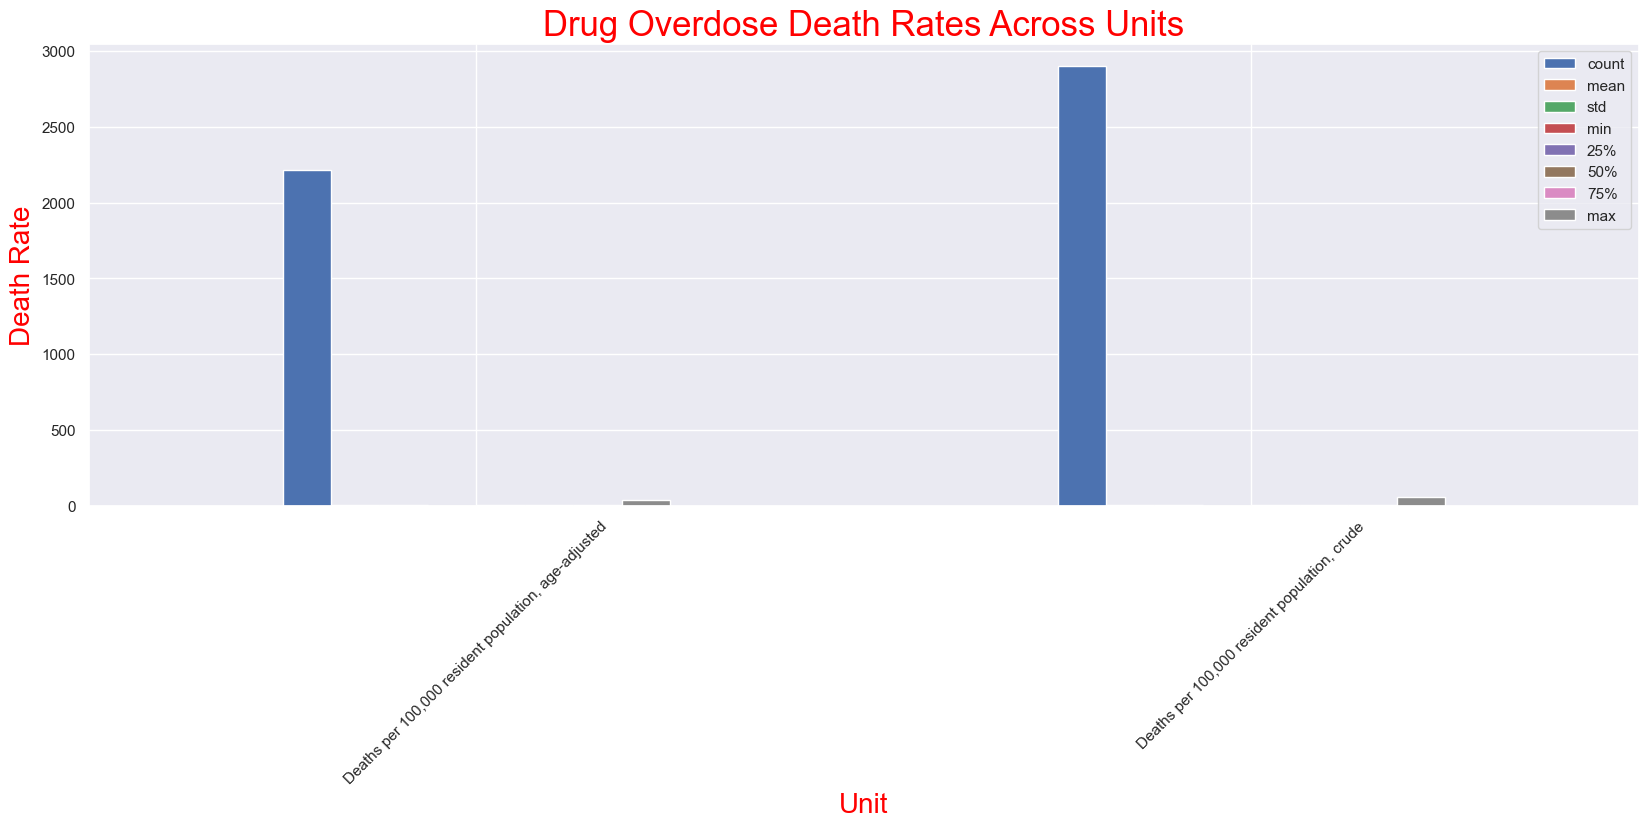

In [179]:
# Impact of different units of measurement on drug overdose death rates: Unit Analysis
unit_analysis = new_data.groupby('UNIT')['ESTIMATE'].describe()
unit_analysis.plot(kind='bar', figsize=(20, 6))
plt.title('Drug Overdose Death Rates Across Units', fontsize=25, color='red')
plt.xlabel('Unit', fontsize=20, color='red')
plt.ylabel('Death Rate', fontsize=20, color='red')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


It is highly noticed that the choice of units for measuring drug overdose death rates may influence the observed rates, as different units can provide varying perspectives and insights on the extent of the issue.

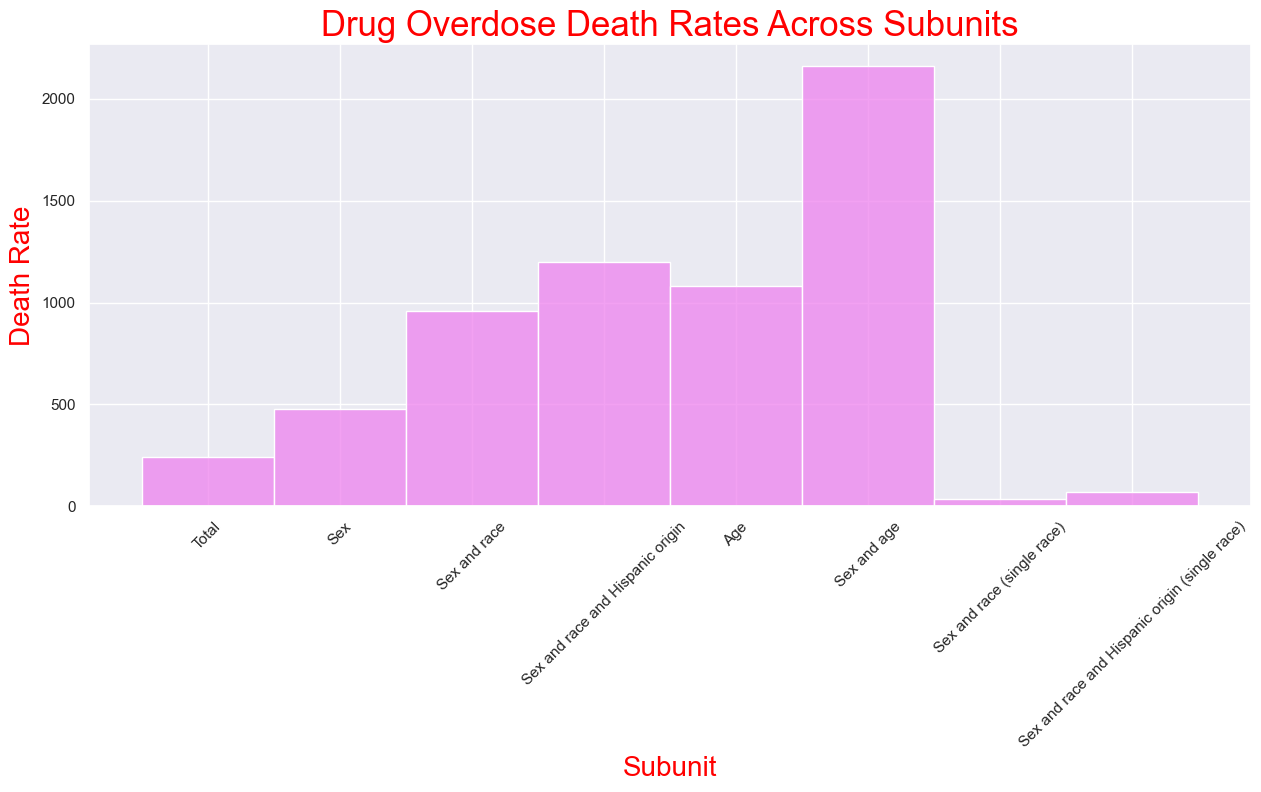

In [181]:
# Analysis of Subunit factors
subunit_analysis = new_data.groupby('STUB_NAME')['ESTIMATE'].describe()
plt.figure(figsize=(15, 6))
sns.histplot(new_data['STUB_NAME'], kde=False, color='violet')
plt.title('Drug Overdose Death Rates Across Subunits',  fontsize=25, color='red')
plt.xlabel('Subunit', fontsize=20, color='red')
plt.ylabel('Death Rate', fontsize=20, color='red')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [182]:
# Missing Value Analysis
missing_value_analysis = new_data['ESTIMATE'].isnull().sum()
print("Number of Missing Values in ESTIMATE column:", missing_value_analysis)

Number of Missing Values in ESTIMATE column: 1111


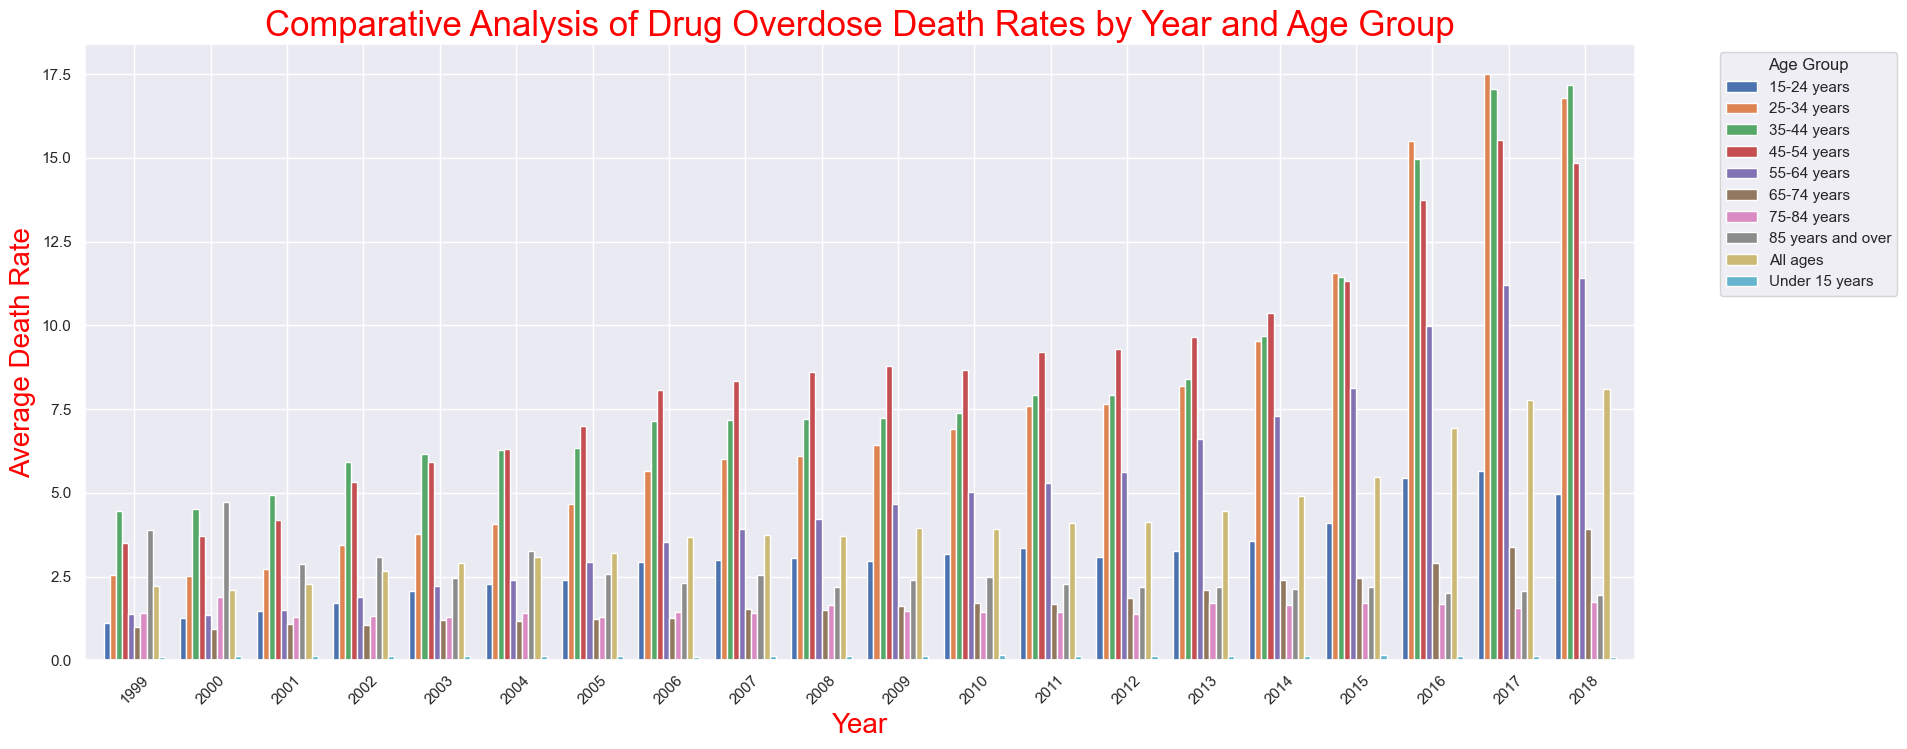

In [184]:
# Comparative Analysis
comparative_analysis = new_data.groupby(['YEAR', 'AGE'])['ESTIMATE'].mean().unstack()
comparative_analysis.plot(kind='bar', figsize=(20, 8), width=0.8)
plt.title('Comparative Analysis of Drug Overdose Death Rates by Year and Age Group', fontsize=25, color='red')
plt.xlabel('Year', fontsize=20, color='red')
plt.ylabel('Average Death Rate', fontsize=20, color='red')
plt.xticks(rotation=45)
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

The comparative analysis of drug overdose death rates by year and age group indicates the changing trends of drug overdoses over time and across different demographic segments.

In conclusion,  valuable insights are obtained from these analyses, showing trends, patterns, and factors associated with drug overdose death rates. These insights can be of importance in public health interventions, policy decisions, and targeted efforts aimed at addressing the issue of drug overdoses and improving outcomes for affected populations. 